

```
Name : Sudarsun S
RegNo : 20BCE1699
Machine Learning Embedded Lab
Topic: Neural Networks for Iris Dataset
```



In [ ]:
import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import normalize
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
target_names = {
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
}
iris_df['species'] = iris_df['target'].map(target_names)
iris_df = iris_df.drop('target', axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
print("Describing the data: ",iris_df.describe())
print("Info of the data:",iris_df.info())

Describing the data:         sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  -

In [ ]:
print("10 first samples of the dataset:",iris_df.head(10))
print("10 last samples of the dataset:",iris_df.tail(10))

10 first samples of the dataset:    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
5  setosa  
6  setosa  
7

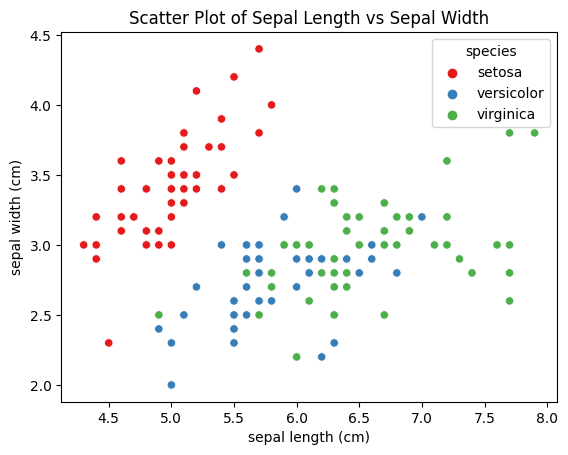

In [ ]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=iris_df, hue='species', palette='Set1')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.show()

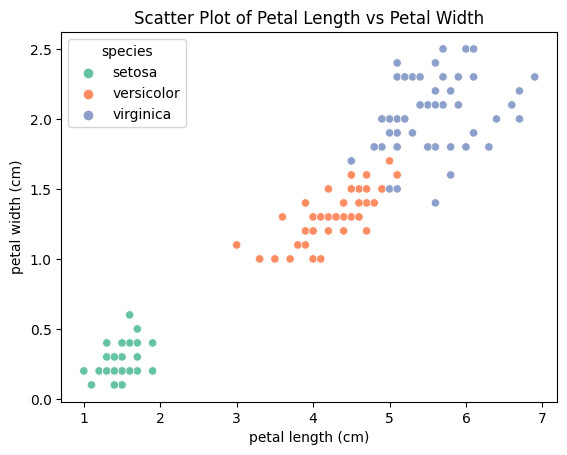

In [ ]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=iris_df, hue='species', palette='Set2')
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

X = iris_df.drop('species', axis=1).values
y = iris_df['species'].values

encoder = LabelBinarizer()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Neural Network Training

In [ ]:
input_size = X_train.shape[1]
hidden_size = 8
output_size = 3
learning_rate = 0.01
epochs = 1000

np.random.seed(0)
weights_input_hidden = np.random.randn(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

### Activation Function Defination

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

###Forward Pass And Back Propogation



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
epochs = 1000
loss_history = []
accuracy_history = []

for epoch in range(epochs):
    hidden_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    output_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_input)
    loss = -np.mean(y_train * np.log(predicted_output + 1e-15) + (1 - y_train) * np.log(1 - predicted_output + 1e-15))

    predicted_labels = np.argmax(predicted_output, axis=1)
    y_train_labels = np.argmax(y_train, axis=1)
    accuracy = np.mean(predicted_labels == y_train_labels)

    d_output = (predicted_output - y_train) / X_train.shape[0]
    d_output_input = d_output * sigmoid_derivative(predicted_output)
    d_hidden = d_output_input.dot(weights_hidden_output.T)
    d_hidden_input = d_hidden * sigmoid_derivative(hidden_output)

    weights_hidden_output -= hidden_output.T.dot(d_output_input) * learning_rate
    bias_output -= np.sum(d_output_input, axis=0, keepdims=True) * learning_rate
    weights_input_hidden -= X_train.T.dot(d_hidden_input) * learning_rate
    bias_hidden -= np.sum(d_hidden_input, axis=0, keepdims=True) * learning_rate

    loss_history.append(loss)
    accuracy_history.append(accuracy)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}')

Epoch 0
Epoch 100
Epoch 200
Epoch 300
Epoch 400
Epoch 500
Epoch 600
Epoch 700
Epoch 800
Epoch 900


### Feed Forward Network

In [ ]:
hidden_input = np.dot(X_test, weights_input_hidden) + bias_hidden
hidden_output = sigmoid(hidden_input)
output_input = np.dot(hidden_output, weights_hidden_output) + bias_output
predicted_output = sigmoid(output_input)

In [ ]:
predicted_labels = np.argmax(predicted_output, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

accuracy = np.mean(predicted_labels == y_test_labels)
print(f'Test accuracy: {accuracy * 100:.2f}%')

Test accuracy: 83.33%


In [ ]:
pip install pydot

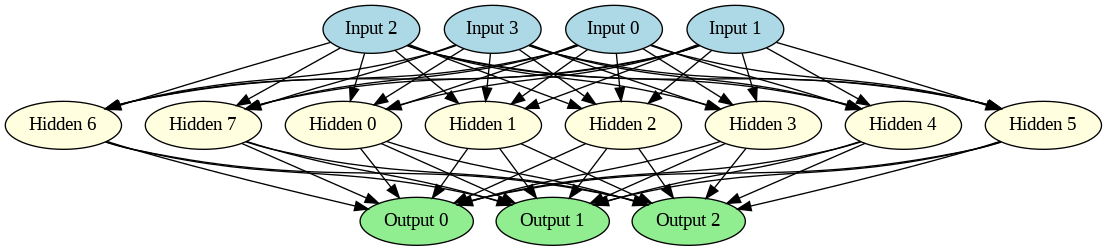

In [ ]:
import numpy as np
import pydot
from tensorflow.keras.utils import plot_model

input_size = X_train.shape[1]
hidden_size = 8
output_size = 3
graph = pydot.Dot(graph_type='digraph')

for i in range(input_size):
    node = pydot.Node(f'Input {i}', style='filled', fillcolor='lightblue')
    graph.add_node(node)

for i in range(hidden_size):
    node = pydot.Node(f'Hidden {i}', style='filled', fillcolor='lightyellow')
    graph.add_node(node)

for i in range(output_size):
    node = pydot.Node(f'Output {i}', style='filled', fillcolor='lightgreen')
    graph.add_node(node)

for i in range(input_size):
    for j in range(hidden_size):
        edge = pydot.Edge(f'Input {i}', f'Hidden {j}')
        graph.add_edge(edge)

for i in range(hidden_size):
    for j in range(output_size):
        edge = pydot.Edge(f'Hidden {i}', f'Output {j}')
        graph.add_edge(edge)

graph.write_png('neural_network_graph.png')

from IPython.display import Image
Image(filename='neural_network_graph.png')

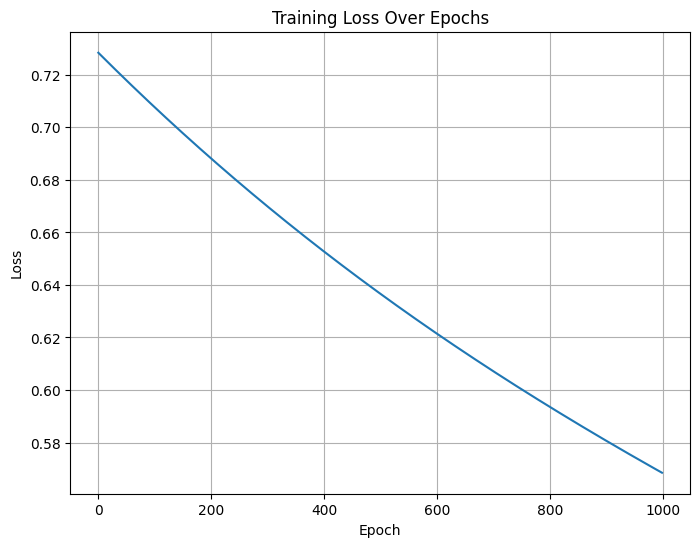

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.show()

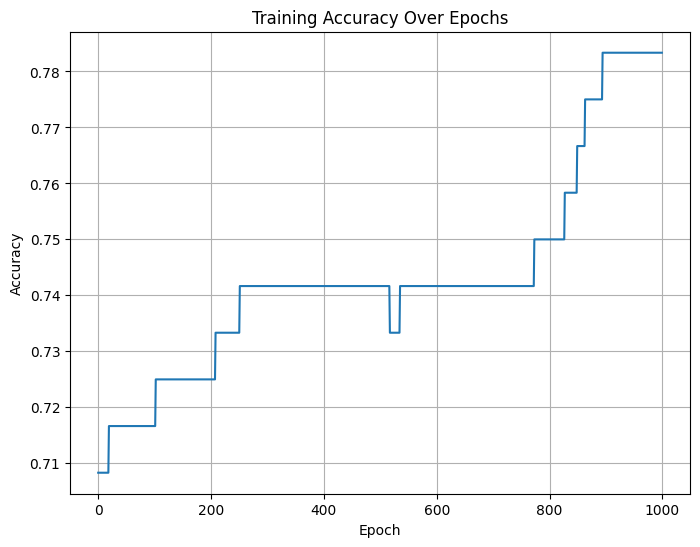

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.grid(True)
plt.show()

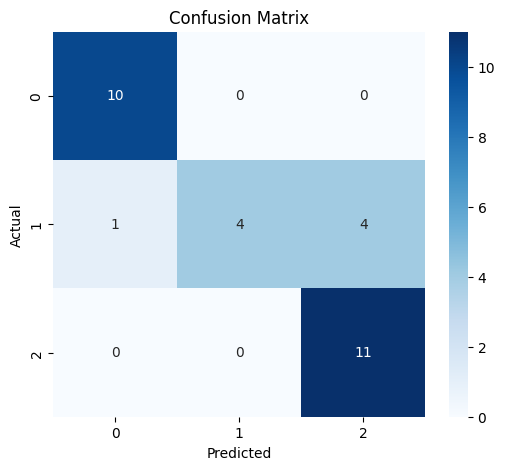

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix suggests that the model achieved perfect classification for the provided dataset, with no misclassification.
The "10" in the upper-left corner indicates that there were 10 instances of class "setosa" that were correctly classified as "setosa". Similarly for others, the diagonal elements of the confusion matrix represent correct classifications

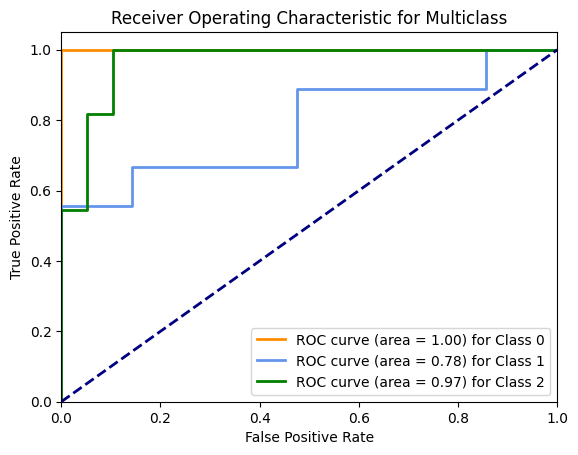

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_one_hot = label_binarize(y_test_labels, classes=range(3))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], predicted_output[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['darkorange', 'cornflowerblue', 'green']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for Class {i}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass')
plt.legend(loc='lower right')
plt.show()


**Class 0 (Setosa):** AUC = 1
An AUC of 1 for Class 0 (Setosa) suggests that the model achieved perfect separation for this class. It means that the model was able to completely distinguish Class 0 from the other classes without any misclassifications or errors.

**Class 1 (Versicolor):** AUC = 0.78
An AUC of 0.78 for Class 1 (Versicolor) suggests that the model's ability to separate Class 1 from the other classes is quite good but not perfect. The AUC of 0.78 indicates a high degree of separation but with some overlap with other classes.

**Class 2 (Virginica):** AUC = 0.97
An AUC of 0.97 for Class 2 (Virginica) suggests that the model's ability to separate Class 2 from the other classes is very good, with minimal overlap. This indicates a high level of confidence in classifying instances of Class 2.